In [1]:
import copy, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# np.set_printoptions(precision=2)
df = pd.read_csv(r"HOUSE_DATA_M1.csv")
df.rename(columns={df.columns[0]:"SIZE",df.columns[1]:"BEDS",df.columns[2]:"FLOORS",df.columns[3]:"H_AGE",df.columns[4]:"PRICE"},inplace=True)
df

,SIZE,BEDS,FLOORS,H_AGE,PRICE
0,2104,5,1,45,460
1,1416,3,2,40,232
2,852,2,1,35,178


In [2]:
x_train = np.array(df.iloc[:,:4])
y_train = np.array(df.iloc[:,4])

In [3]:
def cost_function(w,b,x,y):
    J_cost = 0
    m=x_train.shape[0]
    for i in range(m):
        J_cost +=((np.dot(w,x[i])+b)-y[i])**2
    J_cost = J_cost/(2*m)
    return J_cost

#   m = X.shape[0]
#     cost = 0.0
#     for i in range(m):                                
#         f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
#         cost = cost + (f_wb_i - y[i])**2       #scalar
#     cost = cost / (2 * m)                      #scalar    
#     return cost

In [4]:
def linear_reg_model(x,y,w,b,bb):
    m=x.shape[0]
    y_err = np.zeros(m)
    for i in range(0,m):
        y_err[i] = np.dot(w,x[i])+b
    return y_err

In [1]:
def gradient_function(w,b,x,y):
    m,n=x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0
    
    for j in range(m):
        f_x = (np.dot(w,x[j])+b)-y[j]
#         print(f_x)
        for k in range(n):
            dj_dw[k]+=(f_x)*x[j,k]
#         print(dj_dw)
        dj_db+=(f_x)
    dj_dw = dj_dw/m
    dj_db = dj_db/m
#     print(dj_dw,dj_db,end="\n")
    return dj_dw,dj_db

In [2]:
def compute_gradient(x,y,w_in,b_in,a,n,gradient_function):
    w = copy.deepcopy(w_in)
    b=b_in
    wl,bl,jl=[],[],[]
    dj_dw = np.zeros(x.shape[0])
    for i in range(0,n):
        dj_dw,dj_db = gradient_function(w,b,x,y)
        w = w - a*dj_dw
        wl.append(w)
#         print(a*dj_dw,w-a*dj_dw )
        b = b - a*dj_db
        bl.append(b)
#         print(dj_dw,dj_db,end="\n")
        J = cost_function(w,b,x,y)
        jl.append(J)
    return w,b,J,wl,bl,jl
b_in = 0.
w_in = np.zeros(x_train.shape[1])
w,b,J,wl,bl,jl = compute_gradient(x_train,y_train,w_in,b_in,5.0e-7,1000,gradient_function)  
# b,w=-0.00,[0.2,0.,-0.01,-0.07]
y_err = linear_reg_model(x_train,y_train,w,b,0)
plt.scatter(x_train[:,0],y_train)
plt.plot(x_train[:,0],y_err)

print(w,b,J,"\n",wl[-1],bl[-1],jl[-1],"\n",wl[-2],bl[-2],jl[-2])

NameError: name 'np' is not defined

result:  [ 0.20396569  0.00374919 -0.0112487  -0.0658614 ] -0.0022354075309325345 686.7034116665205 
last values:  [ 0.20396569  0.00374919 -0.0112487  -0.0658614 ] -0.0022354075309325345 686.7034116665205 
last before values:  [ 0.20396393  0.00374592 -0.01123737 -0.065792  ] -0.002233104020377105 2529.4629522316304


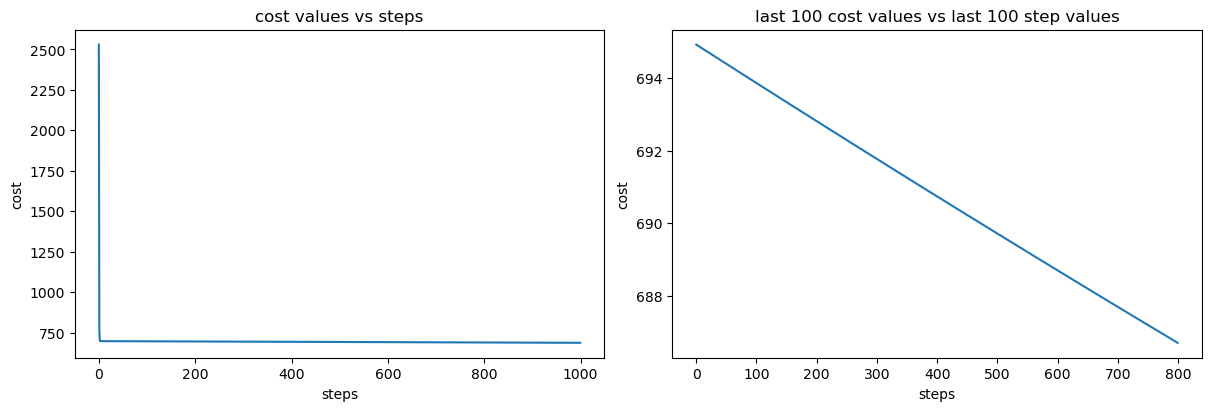

In [7]:
wl=np.array(wl)
il = np.arange(0,1000)
# fig,([ax1,ax2],[ax3,ax4])=plt.subplots(2,2,constrained_layout=True,figsize=(12,4))
fig,([ax1,ax2])=plt.subplots(1,2,constrained_layout=True,figsize=(12,4))
ax1.plot(jl[:])
ax2.plot(jl[200:])
# ax3.plot(bl)
# ax4.plot(wl[:,0])
ax1.set_title("cost values vs steps");ax2.set_title("last 100 cost values vs last 100 step values");
# ax4.set_title("weight values vs steps");ax3.set_title("bias values vs step values");
ax1.set_xlabel("steps");ax1.set_ylabel("cost")
ax2.set_xlabel("steps");ax2.set_ylabel("cost")
# ax3.set_xlabel("bias");ax3.set_ylabel("steps")
# ax4.set_xlabel("weight");ax4.set_ylabel("steps")
print("result: ",w,b,J,"\nlast values: ",wl[-1],bl[-1],jl[-1],"\nlast before values: ",wl[-2],bl[-2],jl[0])
# cost !=0

## by the above statement we can say that the j != 0, w[-1] != w[-2]
## so we can say that cost is still declining so the model isn't accurate.

[1.00000000e+00 2.37642586e-03 4.75285171e-04 2.13878327e-02]
[1.         0.00211864 0.00141243 0.02824859]
[1.         0.00234742 0.00117371 0.04107981]
[1.44927567e-01 3.33588407e-04 1.25798579e-04 3.94852329e-03] 0.14492756655081043 49433.95260096173 
 [1.44927567e-01 3.33588407e-04 1.25798579e-04 3.94852329e-03] 0.14492756655081043 49433.95260096173 
 [1.44782711e-01 3.33254984e-04 1.25672854e-04 3.94457696e-03] 0.14478271139360552 49434.03656438708


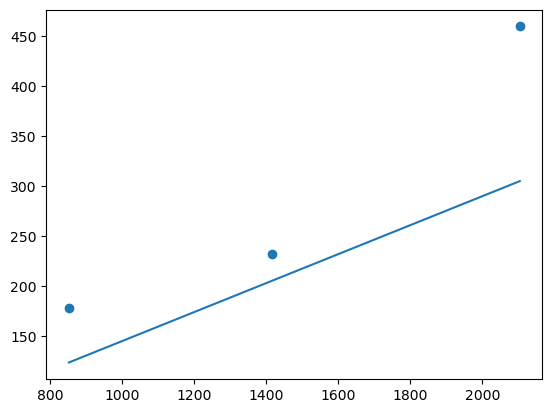

In [8]:
b_in = 0.
w_in = np.zeros(x_train.shape[1])
m,n = x_train.shape
x_scaled = np.zeros((m,n))
for i in range(0,m):
    l=max(x_train[i])
    x_scaled[i]= x_train[i]/l
    print(x_scaled[i])
w,b,J,wl,bl,jl = compute_gradient(x_scaled,y_train,w_in,b_in,5.0e-7,1000,gradient_function)  
# b,w=-0.00,[0.2,0.,-0.01,-0.07]
y_err = linear_reg_model(x_train,y_train,w,b,0)
plt.scatter(x_train[:,0],y_train)
plt.plot(x_train[:,0],y_err)

print(w,b,J,"\n",wl[-1],bl[-1],jl[-1],"\n",wl[-2],bl[-2],jl[-2])

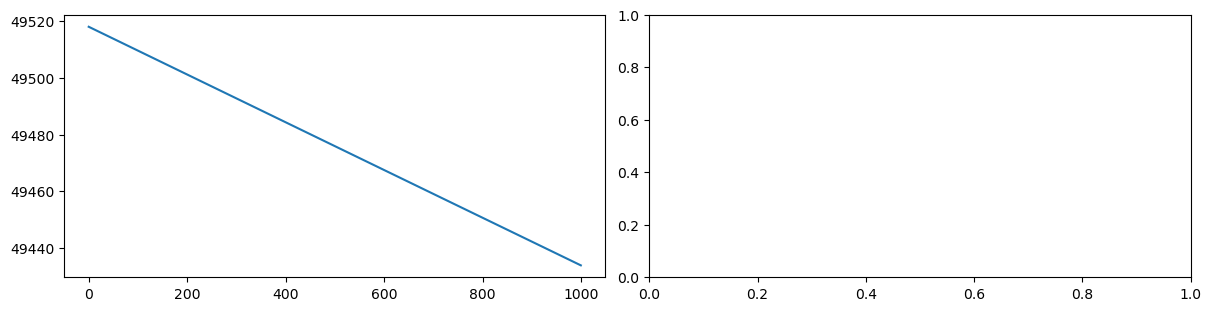

In [9]:
fig ,(ax1,ax2)=plt.subplots(1,2,constrained_layout=True,figsize=(12,3))
ax1.plot(jl)


In [10]:
d=np.zeros((5,))
print(d)

[0. 0. 0. 0. 0.]


In [11]:
print(x_train.shape)

(3, 4)


In [12]:
print(w)

[1.44927567e-01 3.33588407e-04 1.25798579e-04 3.94852329e-03]


In [13]:
print(x_train)

[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]


In [14]:
print(np.dot(x_train[0],w))
print(y_err)
print(y_train)

305.107077311698
[305.25200488 205.5215551  123.76220556]
[460 232 178]
